# Spectral analysis of river discharge data



## Introduction

In this lab, we will do some simple data analysis of river discharge using spectral analysis. We will need a special package within the `Scipy` library so that we don't need to write our own algorithm to do data analysis.


## An example  
Let's start with a simple example to understand how spectral analysis works. If we have a series of data that follows a sines wave as a function of time:


```{math}
:label: sig
u = A \sin(\omega t + \phi)
```
where amplitude $A$ = 0.2, angular frequency $\omega = 2 \pi f$ with $f = 0.5$ Hz being the frequency, and phase $\phi=0$. If we have a sensor to measure the signal at sample rate of 100 Hz for 10 seconds. We can express every time snapshot in a `numpy` array ($t$), and calculate the data ($u$) from Eq. {eq}`sig`:

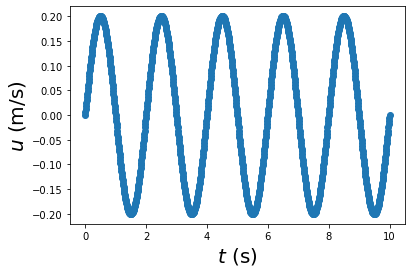

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 0.2
f = 0.5
phi = 0
sample_rate = 100.
t = np.arange(0,10+1/sample_rate,1/sample_rate)
u = A * np.sin(2*np.pi*f*t+phi)

# plt.style.use("fivethirtyeight")   # define the style of the plot
plt.plot(t,u,'o')
plt.xlabel(r'$t$ (s)', fontsize=20)
plt.ylabel(r'$u$ (m/s)', fontsize=20)
plt.show()

Now you can do spectral analysis to this dataset following the simple step:

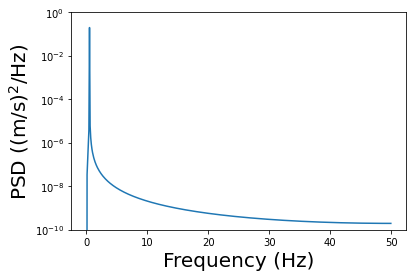

In [2]:
from scipy.signal import periodogram
f, psd = periodogram(u, sample_rate)
plt.figure(2)
plt.plot(f,psd)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('PSD ((m/s)$^2$/Hz)', fontsize=20)
plt.ylim((1e-10,1))
plt.yscale('log')

The above plot is called periodogram, which is essentially the spectral density (or power) of the signal:


```{admonition} In-class exercise
In your own plot, observe two variables: (1) the frequency of the peak spectral density (power), and (2) the maximal frequency on the $x$-axis, i.e., the maximal resolved frequency in the data. Change the sample rate in your code, do you observe changes in the above two variables in your plot?
```

Now, let's add some random noise to the signal and keep the noise level quite small (10\% of its actual amplitude):

In [3]:
u_noise = np.random.randn(len(u)) * 0.1 * A
u = u + u_noise

```{admonition} In-class exercise
Plot the new data set (u vs. t), and repeat spectral analysis. What difference do you observe in your periodogram plot?  
```


```{admonition} In-class exercise
Let's superimpose a secondary signal $u_2 = 0.5 A \sin(2\pi f t)$ with frequency of $f=5$ Hz to the data after adding noise, so that the new data $u_n = u + u_2$,  plot $u_n$ vs. $t$ and perform a spectral analysis to the new data.
```

## Take-home works

### Simulated data
1. In Box question 3, report your observations about the frequencies that are associated with significant power spectral density. Explain why.

2. In Box question 3, calculate the integration of power spectral density over the entire frequency domain (i.e., calculating the area under the spectral plot). Hint: You will get a value of power (with a unit of [u]$^2$). Also calculate the variance of the data $u_n$, do you observe any relationship between these two values?

3. In Box question 3, estimate the noise level from the spectral analysis and compare the estimated value to the actual noise level you added into the data.

### River discharge data

In this subsection, we will work on the real data of river discharge from a USGS station. The data can be downloaded from the web interface of National Water Information System. In this lab, we will work on Missouri River at Kansas City station (site number 06893000). The data at this site can be download from [here](https://waterdata.usgs.gov/nwis/dv?referred_module=sw&site_no=06893000):

If you are interested in other station, feel free to navigate to other stations. For instance, Missouri stream data can be found [here](https://waterwatch.usgs.gov/?m=real&r=mo&w=map):

Once you decide what station you are interested, you can select the duration of the data that you would like to download.

In this lab, we want to study the time series of river discharge in terms of return frequencies, please select a site where at least 10-year data is available. I selected the daily stream flow data in 1991/01/01 - 2020/12/31 at the Kansas City site. Select output format "Tab-separated" and click "Go", the data will be shown on the web-browser. Copy all the data (you can use 'Ctl-a' and 'Ctl-C' to do so) and paste them to the MicroSoft Excel, and save the data with the name "usgs06893000\19910101\20201231.csv"). Add the following information to the *33rd row* of Excel file (which will be used later in the coding) and save the file again, see below figure.

```{image} imgs/csv.png
:align: center
:width: 600 px
```

The following steps should be done to pre-process the data:
* read the .csv file using a package called `pandas`
* remove the data that has problems (e.g., gauge height $<$ 0)
* interpolate missing data


You can copy the followng code into your own Python IDE or directly work in the jupyter-notebook to execute above functionalities.

In [4]:
# read data using pandas for easy data processing
import pandas as pd
df = pd.read_csv('usgs06893000_19910101_20201231.csv',
           skiprows = 32)
# remove negative numbers for discharge and gauge height
df.gauge[df.gauge<0] = np.nan
df.discharge[df.discharge<0] = np.nan

# conver the 'string' type to 'datetime' type for years and dates
data_dt = pd.to_datetime(df['datetime'])
# interpolation for missing data
gauge = df.gauge.interpolate(method='spline',order=4)
discharge = df.discharge.interpolate(method='spline',order=4)

FileNotFoundError: [Errno 2] No such file or directory: 'usgs06893000_19910101_20201231.csv'

Please work on these problems:

1. Plot the gauge height vs. year time, discharge vs. year time and gauge height vs. discharge using subplot. Use correct label.

2. Perform the spectrum analysis to the river discharge data. Do you observe peak values of spectral density at certain frequency? On the other hand, does discharge follow a periodic signal? What conclusion can you draw from spectral analysis?

```{hint}
You can use the following code to calculate sample rate and convert its Python type to the correct one for spectral analysis (or you can simply use: "sample_rate = 1.0" to define the sample rate of 1 per day)
```

In [ ]:
# define sample rate, unit: per day
dt = np.diff(data_dt).mean()
day = dt.astype('timedelta64[D]')
dt = day / np.timedelta64(1, 'D')
sample_rate = 1/dt